In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests as req
req.__version__
#import the API key
from config import weather_api_key
import time
from datetime import datetime

In [15]:
#create a set of random latitudes and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs
#zip puts objects into a tuple

In [16]:
#add latitudes and longitudes to a list
coordinates=list(lat_lngs)

In [17]:
#coordinates

In [18]:
#create a list to hold the cities
cities=[]
#identify the nearest city for each latitude and longitude combination
for i in coordinates:
    city=(citipy.nearest_city(i[0], i[1]).city_name)
    #if city is unique add it to the list
    if city not in cities:
        cities.append(city)
#print to confirm count
len(cities)
cities

['lata',
 'severo-kurilsk',
 'mount gambier',
 'yellowknife',
 'northam',
 'bredasdorp',
 'albany',
 'belushya guba',
 'voorst',
 'ouango',
 'russell',
 'bluff',
 'natal',
 'upernavik',
 'vaini',
 'arvika',
 'hermanus',
 'viligili',
 'lorengau',
 'bambous virieux',
 'taolanaro',
 'ahipara',
 'kodiak',
 'chokurdakh',
 'faanui',
 'limbazi',
 'cumaribo',
 'linjiang',
 'hithadhoo',
 'puerto ayora',
 'yerbogachen',
 'sur',
 'rikitea',
 'najran',
 'ambilobe',
 'east london',
 'saldanha',
 'fort nelson',
 'kaeo',
 'kusatsu',
 'punta arenas',
 'kaitangata',
 'cape town',
 'atambua',
 'kapaa',
 'pevek',
 'attawapiskat',
 'biak',
 'airai',
 'thompson',
 'barrow',
 'ushuaia',
 'jamestown',
 'konstantinovka',
 'butaritari',
 'namibe',
 'bengkulu',
 'kwinana',
 'ibra',
 'mys shmidta',
 'gurskoye',
 'sooke',
 'shimoda',
 'vila franca do campo',
 'tucurui',
 'new norfolk',
 'chimoio',
 'khatanga',
 'busselton',
 'iqaluit',
 'grand river south east',
 'popondetta',
 'keelung',
 'anadyr',
 'porto de mo

In [19]:
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
# Create an endpoint URL for a city.
#city_url = url + "&q=" + city

In [24]:
#create an empty list to hold city data
city_data=[]
#print the beginning of the logging
print("Beginning Data Retrieval      ")
print("-----------------------------")

#create counters
record_count=1
set_count=1

Beginning Data Retrieval      
-----------------------------


In [25]:
#loop through all cities in our list:
#enumerate iterates through list of cities and retrieves both the index and the city from the list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50==0 and i>=50):
        set_count+=1
        record_count=1
        #prgram pauses for 60 seconds you can only do 60 calls per minutes on OpenWeatherMap API free version
        time.sleep(60)
        
    #create endpoint URL with each city
    city_url= url + "&q=" + city.replace(" ","+")
        
    #log the URL, record, and set the numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #add 1 to the record count
    record_count+=1

        
#run an API request for each of the cities
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
            # If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | northam
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | voorst
Processing Record 10 of Set 1 | ouango
Processing Record 11 of Set 1 | russell
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | natal
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | arvika
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | viligili
City not found. Skipping...
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | ahipara
Processing Record

Processing Record 38 of Set 4 | suba
Processing Record 39 of Set 4 | faya
Processing Record 40 of Set 4 | cayenne
Processing Record 41 of Set 4 | dustlik
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | donskoye
Processing Record 44 of Set 4 | jijiga
Processing Record 45 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 46 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | ushtobe
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | fairbanks
Processing Record 1 of Set 5 | navahrudak
Processing Record 2 of Set 5 | fasa
Processing Record 3 of Set 5 | valence
Processing Record 4 of Set 5 | burnie
Processing Record 5 of Set 5 | huarmey
Processing Record 6 of Set 5 | toliary
City not found. Skipping...
Processing Record 7 of Set 5 | omboue
Processing Record 8 of Set 5 | la paz
Processing Record 9 of

Processing Record 27 of Set 8 | mahebourg
Processing Record 28 of Set 8 | provideniya
Processing Record 29 of Set 8 | meyungs
City not found. Skipping...
Processing Record 30 of Set 8 | maningrida
Processing Record 31 of Set 8 | bantou
Processing Record 32 of Set 8 | botshabelo
Processing Record 33 of Set 8 | novyy urengoy
Processing Record 34 of Set 8 | north bend
Processing Record 35 of Set 8 | evensk
Processing Record 36 of Set 8 | sorvag
City not found. Skipping...
Processing Record 37 of Set 8 | baturaja
Processing Record 38 of Set 8 | amapa
Processing Record 39 of Set 8 | guatire
Processing Record 40 of Set 8 | marcona
City not found. Skipping...
Processing Record 41 of Set 8 | bichis
Processing Record 42 of Set 8 | vilhena
Processing Record 43 of Set 8 | kitob
Processing Record 44 of Set 8 | uyuni
Processing Record 45 of Set 8 | uruacu
Processing Record 46 of Set 8 | yar-sale
Processing Record 47 of Set 8 | reitz
Processing Record 48 of Set 8 | san jose
Processing Record 49 of S

Processing Record 13 of Set 12 | artyk
City not found. Skipping...
Processing Record 14 of Set 12 | puerto cabello
Processing Record 15 of Set 12 | tototlan
Processing Record 16 of Set 12 | osypenko
Processing Record 17 of Set 12 | tabuk
Processing Record 18 of Set 12 | juifang
City not found. Skipping...
Processing Record 19 of Set 12 | saleaula
City not found. Skipping...
Processing Record 20 of Set 12 | hambantota
Processing Record 21 of Set 12 | roald
Processing Record 22 of Set 12 | catuday
Processing Record 23 of Set 12 | saint anthony
Processing Record 24 of Set 12 | la sarre
Processing Record 25 of Set 12 | gulshat
City not found. Skipping...
Processing Record 26 of Set 12 | mount pleasant
Processing Record 27 of Set 12 | sao pedro do sul
Processing Record 28 of Set 12 | salisbury
Processing Record 29 of Set 12 | borovoy
Processing Record 30 of Set 12 | litoral del san juan
City not found. Skipping...
Processing Record 31 of Set 12 | les cayes
Processing Record 32 of Set 12 | a

In [26]:
#convert the array of dictinoaries to a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lata,40.1629,-8.3327,54.81,69,0,4.47,PT,2021-12-17 20:13:27
1,Severo-Kurilsk,50.6789,156.1250,27.39,88,100,29.80,RU,2021-12-17 20:13:28
2,Mount Gambier,-37.8333,140.7667,62.51,82,90,16.11,AU,2021-12-17 20:13:28
3,Yellowknife,62.4560,-114.3525,-25.71,99,53,5.37,CA,2021-12-17 20:08:33
4,Northam,51.0333,-4.2167,45.39,87,10,13.13,GB,2021-12-17 20:13:28
5,Bredasdorp,-34.5322,20.0403,61.29,72,0,21.09,ZA,2021-12-17 20:13:29
6,Albany,42.6001,-73.9662,51.75,38,54,1.99,US,2021-12-17 20:12:09
7,Voorst,52.1667,6.1333,48.45,94,100,4.14,NL,2021-12-17 20:13:29
8,Ouango,4.3133,22.5552,77.56,46,67,0.69,CF,2021-12-17 20:13:30
9,Russell,32.3502,-85.1999,72.55,80,75,3.44,US,2021-12-17 20:13:30


In [28]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lata,PT,2021-12-17 20:13:27,40.1629,-8.3327,54.81,69,0,4.47
1,Severo-Kurilsk,RU,2021-12-17 20:13:28,50.6789,156.1250,27.39,88,100,29.80
2,Mount Gambier,AU,2021-12-17 20:13:28,-37.8333,140.7667,62.51,82,90,16.11
3,Yellowknife,CA,2021-12-17 20:08:33,62.4560,-114.3525,-25.71,99,53,5.37
4,Northam,GB,2021-12-17 20:13:28,51.0333,-4.2167,45.39,87,10,13.13
...,...,...,...,...,...,...,...,...,...
559,Leh,IN,2021-12-17 20:29:36,34.1667,77.5833,-3.44,57,0,4.41
560,Lazaro Cardenas,MX,2021-12-17 20:29:38,17.9583,-102.2000,83.32,64,100,8.39
561,Adwa,ET,2021-12-17 20:29:38,14.1646,38.8955,62.47,52,6,1.14
562,Palmer,US,2021-12-17 20:29:39,42.1584,-72.3287,57.81,19,40,3.00


In [30]:
output_data_file="weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City ID")

In [35]:
import time

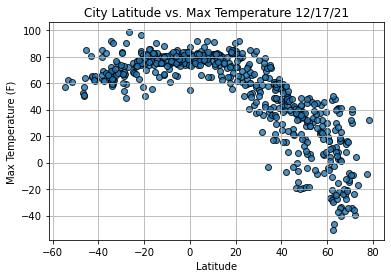

In [40]:
#create a scatter plot for max temp vs. latitude for different cities
#extract data
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

#build scatter 
plt.scatter(lats,max_temps,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

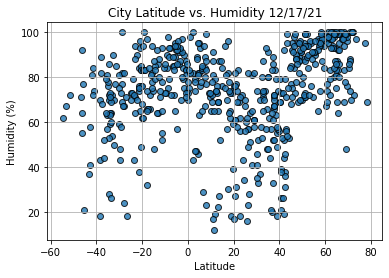

In [41]:
#build scatter 
plt.scatter(lats,humidity,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

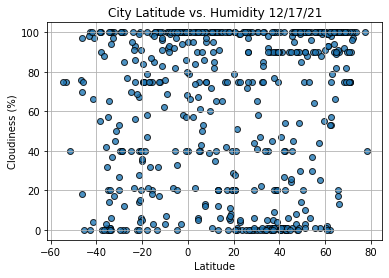

In [42]:
#build scatter 
plt.scatter(lats,cloudiness,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

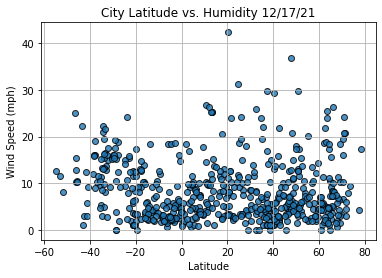

In [43]:
#build scatter 
plt.scatter(lats,wind_speed,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()